In [4]:
#光センサーの日付と情報の表示とCSV出力
import csv
import serial
import datetime
import time
import re
format = "%Y.%m.%d %H:%M:%S"
tt = time.strftime(format, time.localtime())
ser = serial.Serial('/dev/ttyACM0', timeout=2000)
f = open('ArduinoRead.csv', 'w') 
csvWriter = csv.writer(f)
smoothing = 100# log 100 data to confirm stability later
Column = ['date','Light-sensor']
csvWriter.writerow(Column)
for i in range(1, 50):
    t1=time.strftime(format, time.localtime())
    aa = [ser.readline(smoothing)]
    #文字列数字を数値に変換
    listData = []
    listData.append(t1)
    listData.append(aa)
    csvWriter.writerow(listData)
    print(listData)
f.close()
    

['2020.01.13 17:00:06', [b'Magnetic Field in X-Axis : 1499Magnetic Field in Y-Axis : -599Magnetic Field in Z-Axis : -220Magneti']]
['2020.01.13 17:00:09', [b'c Field in X-Axis : 1498Magnetic Field in Y-Axis : -600Magnetic Field in Z-Axis : -216Magnetic Field']]
['2020.01.13 17:00:11', [b' in X-Axis : 1496Magnetic Field in Y-Axis : -600Magnetic Field in Z-Axis : -215Magnetic Field in X-A']]
['2020.01.13 17:00:13', [b'xis : 1494Magnetic Field in Y-Axis : -599Magnetic Field in Z-Axis : -217Magnetic Field in X-Axis : 1']]
['2020.01.13 17:00:15', [b'500Magnetic Field in Y-Axis : -604Magnetic Field in Z-Axis : -217Magnetic Field in X-Axis : 1495Magn']]
['2020.01.13 17:00:17', [b'etic Field in Y-Axis : -601Magnetic Field in Z-Axis : -218Magnetic Field in X-Axis : 1490Magnetic Fi']]
['2020.01.13 17:00:20', [b'eld in Y-Axis : -603Magnetic Field in Z-Axis : -219Magnetic Field in X-Axis : 1492Magnetic Field in ']]
['2020.01.13 17:00:22', [b'Y-Axis : -595Magnetic Field in Z-Axis : -223Magnetic Fie

[]

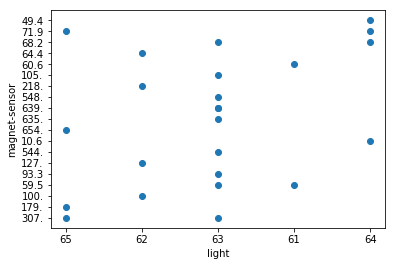

In [10]:
#/Arduino.csvを読み込み奇数行と偶数行を取得
#不要文字列を磁極と磁力数値に分割し、グラフ作成
import pandas as pd
import re
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("ArduinoRead.csv", encoding='utf-8')
# 奇数行の"都道府県"列を埋める（上の行の値で埋める）
df = df.fillna(method='ffill')
#偶数行のカラム名変更＆型変更）
df_even = df[::2].rename(columns={'date': 'date','Light-sensor': 'magnetic'})

#奇数行のカラム名変更
df_odd = df[1::2].rename(columns={'date': 'date','Light-sensor': 'cds'})
df3 = pd.merge(df_even, df_odd)
num1 = df3['cds'].replace("\\D","", regex=True)
pole = df3['magnetic'].str[3]  #磁極
pole_num = df3['magnetic'].str[29:33]  #磁力数値
df_new = df3.assign(cdsnumber=num1)
df_new1 = df_new.assign(pole1=pole)
df_new2 = df_new1.assign(polenum1=pole_num)

df_new2.to_csv('ArduinoRead1.csv') #保存

plt.plot(df_new2["cdsnumber"],
        df_new2['polenum1'],'o')
plt.xlabel('light')
plt.ylabel('magnet-sensor')

plt.plot()

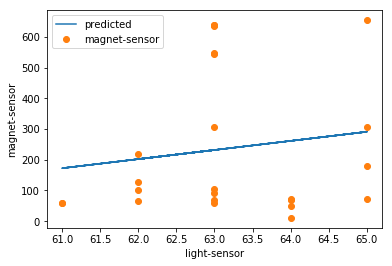

In [11]:
#LinearRegression with ArduinoRead1.csv 
import pandas as pd
import re
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline


df = pd.read_csv("ArduinoRead1.csv", encoding='utf-8')
x = df['cdsnumber']
y = df['polenum1']
model = linear_model.LinearRegression()
model.fit(x[:, np.newaxis], y)
yy = model.predict(x[:, np.newaxis])
plt.plot(x, yy, label='predicted')
plt.plot(x, y, 'o', label='magnet-sensor')
plt.xlabel('light-sensor')
plt.ylabel('magnet-sensor')
plt.legend()

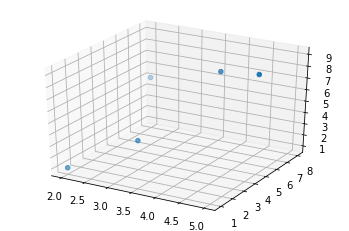

In [2]:
#3axes example
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
x = [2, 2, 3, 4, 5]
y = [1, 8, 3, 6, 5]
z = [1, 5, 3, 8, 9]
 
ax.scatter(x, y, z)
plt.show()